In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import requests
import json
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from nltk.tokenize import sent_tokenize,word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import scipy.stats as stats
iopub_data_rate_limit=10000000000
plt.rcParams["patch.force_edgecolor"] = True

In [29]:
#read in csv
final_yelp = pd.read_csv('./Final__Generated_Yelp_API_Sentiment_Analysis.csv')
crime_data = pd.read_csv('./Final_Generated_Crime_Austin_2014_to_2016.csv')
small_business = pd.read_csv('./Affordable_Housing_Inventory__AHI_.csv')

affordable_housing = small_business.groupby('Zip Code').agg({'Project ID':'count'}).reset_index()
affordable_housing= affordable_housing.rename(columns={'Zip Code':'Zip'})

affordable_housing['Zip']= affordable_housing['Zip'].astype(int)

high_crime = affordable_housing[  (affordable_housing['Zip'] == 78741) | (affordable_housing['Zip'] == 78745) | (affordable_housing['Zip'] == 78723) |  (affordable_housing['Zip'] == 78745) | (affordable_housing['Zip'] == 78702)]
crime_df = crime_df.rename(columns={'GO Highest Offense Desc':'Crime Count'})
crime_housing = high_crime.merge(crime_df,how='inner')
crime_housing.head()

stats.pearsonr(crime_housing['Crime Count'], crime_housing['Project ID'])


(-0.596869790700848, 0.403130209299152)

In [12]:
unit_type = small_business.groupby(['Zip Code', 'Unit Type'], as_index = False).count()
unit_type

crime_df = crime_data.groupby('Zip').agg({'GO Highest Offense Desc':'count'})
crime_df = crime_df.reset_index()


In [ ]:
unit_type.head()
unit_type = unit_type.rename(columns={'Zip Code':'Zip'})
crime_df = crime_df.rename(columns={'GO Highest Offense Desc':'Crime Count'})
unit_type_crime = unit_type.merge(crime_df,how='outer',on='Zip')

unit_type_crime[unit_type_crime['Zip'] == 78753 
              
                ]

In [ ]:
sns.jointplot(x="Crime Count", y="Project ID", data=multifamily, kind="reg",color='b');

plt.ylabel('Number of Multifamily Projects')
plt.savefig('Number of Crimes vs Number of Multifamily Projects.png')



In [9]:

single_family = unit_type_crime[unit_type_crime['Unit Type'] == 'Single Family']
sns.jointplot(x="Crime Count", y="Project ID", data=single_family, kind="reg",color='b');

plt.savefig('Number of Crimes vs Number of SingleFamily Projects.png')

NameError: name 'unit_type_crime' is not defined

In [10]:
duplex = unit_type_crime[unit_type_crime['Unit Type'] == 'Duplex']
sns.jointplot(x="Crime Count", y="Project ID", data=duplex, kind="reg",color='b');
plt.savefig('Number of Crimes vs Number of Duplex Projects.png')

NameError: name 'unit_type_crime' is not defined

In [11]:
crime_df = crime_data.groupby('Zip').agg({'GO Highest Offense Desc':'count'})
crime_df = crime_df.reset_index()

price_df = final_yelp.groupby('Zip').agg({'Price Value':'mean'})
price_df = price_df.reset_index()

sentiment_df = final_yelp.groupby('Zip').agg({'First_Review_Sentiment metric_Compound':'mean','Second_Review_Sentiment metric_Compound':'mean','Third_Review_Sentiment metric_Compound':'mean'})
sentiment_df = sentiment_df.reset_index()

crime_price_df = crime_df.merge(price_df,on='Zip',how='outer')
final_df = crime_price_df.merge(sentiment_df,on='Zip',how='outer')
final_df.head()

NameError: name 'crime_data' is not defined

In [12]:

final_df_Crime = pd.DataFrame(final_df[['Zip','GO Highest Offense Desc']])



affordable_housing_final = affordable_housing.merge(final_df_Crime, on = 'Zip',how='outer')
affordable_housing_final.head(50)


NameError: name 'final_df' is not defined

In [13]:

austin_zips=['78735', '78701', '78753', '78724', '78741', '78704',
             '78748', '78758', '78744', '78747', '78756', '78759', 
             '78723', '78745', '78749', '78751', '78752', '78731', 
             '78702', '78722', '78705', '78757', '78721', '78739', 
             '78729', '78613', '78617', '78746', '78750', '78719', 
             '78703', '78736', '78653', '78727', '78652', '78754', 
             '78726', '78717', '78660', '78725', '78712', '78730', 
             '78742', '78728', '78732', '78737', '78733', '78610']

affordable_housing_1 = affordable_housing.loc[affordable_housing['Zip'].isin(austin_zips)]


affordable_housing_1.head(50)

NameError: name 'affordable_housing' is not defined

In [14]:
#creating DF
final_df_Crime_1= final_df_Crime.loc[final_df_Crime['Zip'].isin(affordable_housing_1['Zip'])]
affordable_housing_1['Zip'] = affordable_housing_1['Zip'].astype('int')
affordable_housing_final = affordable_housing_1.merge(final_df_Crime_1, on = 'Zip',how='inner')
affordable_housing_final = affordable_housing_final.rename(columns = {'GO Highest Offense Desc':'Crime Count','Project ID':'Affordable Housing Project Count'})


#ploting
sns.set_style('whitegrid')
affordable_housing_final.plot('Crime Count','Affordable Housing Project Count',kind='scatter',color='r')
plt.title('Number of Affordable Housing Project vs Crime Count',fontsize=(15))
plt.tight_layout()



#Pearson Test
stats.pearsonr(affordable_housing_final['Crime Count'], affordable_housing_final['Affordable Housing Project Count'])

plt.savefig('./Number of Affordable Housing Project vs Crime Count.png')

NameError: name 'final_df_Crime' is not defined

In [15]:
stats.pearsonr(affordable_housing_final['Crime Count'], affordable_housing_final['Affordable Housing Project Count'])


NameError: name 'affordable_housing_final' is not defined

In [16]:
price = final_df.dropna()
sns.set_style('whitegrid')
price.plot('GO Highest Offense Desc','Price Value',kind = 'scatter',color='r')
plt.xlabel('Number of Crimes in the Area')
plt.ylabel('Average Price of Restaurant in the Area')
plt.title('Average Price of Restaurant in the Area vs Number of Crimes in the Area',fontsize=(15)
         )
plt.savefig('./Average Price of Restaurant in the Area vs Number of Crimes in the Area')

NameError: name 'final_df' is not defined

In [17]:
final_df

NameError: name 'final_df' is not defined

In [18]:
stats.pearsonr(price['GO Highest Offense Desc'], price['Price Value'])


NameError: name 'price' is not defined

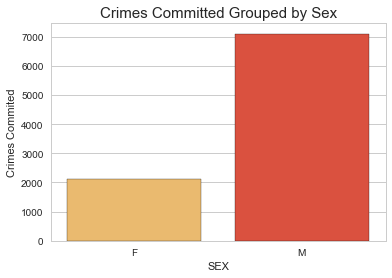

In [19]:
racial_profile=pd.read_csv('./Racial_Profiling_Dataset.csv')
racial_profile.head()

api_key = '9ClaIzOC8t9s8YNbeNRkYQzd64ZQ3wupHnVBANks7weZKcFTFKYKDCJFYfGW3Amt'

sns.set_style('whitegrid')
racial_df = pd.DataFrame(racial_profile.groupby('SEX').PRIMARY_KEY.count()).reset_index()
racial_df.head()
sns.barplot(x='SEX',y='PRIMARY_KEY',data=racial_df,ci=False,palette='YlOrRd')


plt.ylabel('Crimes Commited')
plt.title('Crimes Committed Grouped by Sex',fontsize=(15)
         )


plt.savefig('./Crimes Commited Groupbed by Sex ')





In [20]:
racial_df.head()
racial_df = racial_df.rename(columns={'SEX':'Sex','PRIMARY_KEY':'Crimes Committed'})
racial_df['Percent of Crimes Commited'] = racial_df['Crimes Committed']/(racial_df['Crimes Committed'].sum())*100
racial_df.head(10)

,Sex,Crimes Committed,Percent of Crimes Commited
0,F,2105,22.858074
1,M,7104,77.141926


In [21]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [22]:
plt.style.use('seaborn')
plt.pie(racial_df['PRIMARY_KEY'],labels=['Female','Male'],colors=['orange','r'],autopct='%1.0f%%')
plt.title('Crimes Committed Represented by Sex')
plt.savefig('Crimes Committed Represented by Sex')

KeyError: 'PRIMARY_KEY'

In [23]:
races_df = races_df.rename(columns={'APD_RACE_DESC':'Race','PRIMARY_KEY':'Crimes Committed'})
races_df['Percent of Crimes Commited'] = races_df['Crimes Committed']/(races_df['Crimes Committed'].sum())*100
races_df.head(10)

NameError: name 'races_df' is not defined

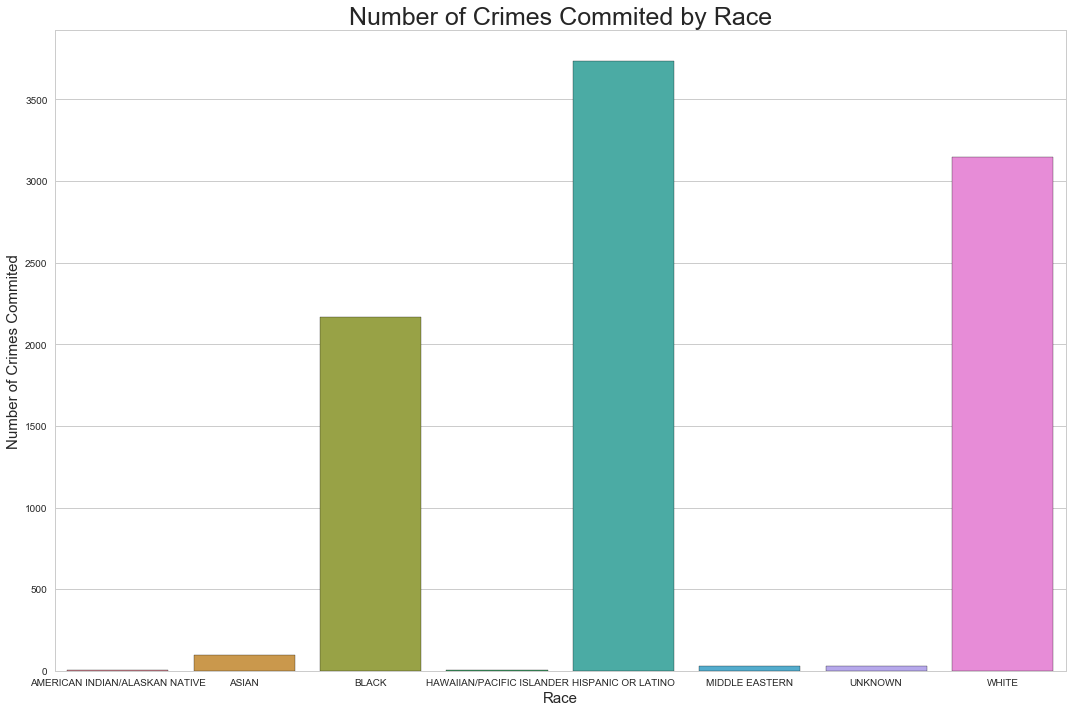

In [24]:
races_df = (racial_profile.groupby('APD_RACE_DESC').PRIMARY_KEY.count()).reset_index()

plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.barplot('APD_RACE_DESC','PRIMARY_KEY',data= races_df)
plt.xlabel('Race',fontsize=15)
plt.ylabel('Number of Crimes Commited',fontsize=15)
plt.title('Number of Crimes Commited by Race',fontsize=25)
plt.xticks(rotation=0);
plt.tight_layout()
plt.savefig('./Number of Crimes Commited by Race.png')


In [25]:
category_df = pd.DataFrame(final_yelp['Category'].value_counts()).reset_index()
category_df = category_df.loc[0:15,:]
category_df.head(50)

category_df.plot('index','Category',kind='bar',figsize = (15,10))
plt.xlabel('Type of business')
plt.ylabel('Number of Business')
plt.title('Type of Business vs Number of Business in Austin')

NameError: name 'final_yelp' is not defined

In [ ]:
final_yelp.dropna(inplace=True)



In [ ]:
final_yelp.shape
final_yelp_2 = final_yelp.groupby('Zip').Business_Ratings.mean()
final_yelp_2_high = pd.DataFrame(final_yelp_2.sort_values(ascending=False)).reset_index()

final_yelp_2_high.loc[0:15,:].plot('Zip','Business_Ratings',kind='bar')
plt.ylim([4,5])


final_yelp_3_high = pd.DataFrame(final_yelp_2.sort_values(ascending=True)).reset_index()

final_yelp_3_high.loc[0:15,:].plot('Zip','Business_Ratings',kind='bar')
plt.ylim([4,5])

In [26]:
test_1

NameError: name 'test_1' is not defined